<a href="https://colab.research.google.com/github/SinghNavnoor/CodingDojo_Project_2/blob/main/eda_adults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

Navnoor Singh Kahlon

### Importing Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/adult.csv')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Looking at the shape of the dataset.

In [ ]:
df.shape

(48842, 15)

### Looking for duplicates

In [ ]:
#summing the total number of duplicates
df.duplicated().sum()


52

In [ ]:
#dropping all duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#confirming no more duplicates exist in the dataset
df.duplicated().sum()

0

### Confirming dtypes are correct. 

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


- Income needs to be int64.  

In [ ]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

#### We can look at the Income column as a binary categorical column. 
- 0 representing incomes less than or equal to 50K
- 1 representing incomes greater than 50K

#### Going to keep Income, our target column, object type. 

### Looking for missing values.

In [ ]:
df.isna().sum()
#no missing values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Looking for any inconsistencies 

#### Inconsistencies in Object type column

In [ ]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == object:
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')

The count values for workclass are:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
-----------------------------------------------

___
The count values for education are:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64
-----------------------------------------------

___
The count values for marital-status are:
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed    

#### Three object type columns have '?' as one of their class types. This could be considered null values. 
#### I will be turning "?" into np.nan and then that will be imputed accordingly during the model building. 
##### Columns I will be creating null values for are:
- **occupation**
- **workclass**
- **native-country**

In [ ]:
#importing numpy
import numpy as np

#changing "?" to np.nan for workclass
df['workclass'] = df['workclass'].replace({'?': np.nan})
#changing "?" to np.nan for occupation
df['occupation'] = df['occupation'].replace({'?': np.nan})
#changing "?" to np.nan for native-country
df['native-country'] = df['native-country'].replace({'?': np.nan})

In [ ]:
#confirming the changes have made for workclass, occupation and native-country
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

- **Now we have actual missing values that will be handled during model building.**

- **We do not have any inconsistencies in the Object type columns.**

#### Inconsistencies in Numeric type column

In [ ]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == 'int64':
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')

The count values for age are:
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
-----------------------------------------------

___
The count values for fnlwgt are:
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64
-----------------------------------------------

___
The count values for educational-num are:
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64
-----------------------------------------------

___
The count values for capital-gain are:
0        44755
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040  

- **There are no inconsistencies in the numeric columns**

### Summary stats

In [ ]:
#Creating another loop to get the summary stats of Numerical columns. 
for i in all_columns:
  if df[i].dtypes == int:
    m = df[i].mean()
    max = df[i].max()
    min = df[i].min()
    mode = df[i].mode()
    print(f"{df[i].name.capitalize()}:")
    print(f'Mean = {m}, Max = {max}, Min = {min}')
    print('--------------' * 4)
    print('\n')

Age:
Mean = 38.652797704447636, Max = 90, Min = 17
--------------------------------------------------------


Fnlwgt:
Mean = 189668.9993646239, Max = 1490400, Min = 12285
--------------------------------------------------------


Educational-num:
Mean = 10.07880713260914, Max = 16, Min = 1
--------------------------------------------------------


Capital-gain:
Mean = 1080.21768805083, Max = 99999, Min = 0
--------------------------------------------------------


Capital-loss:
Mean = 87.59557286329166, Max = 4356, Min = 0
--------------------------------------------------------


Hours-per-week:
Mean = 40.42588645214183, Max = 99, Min = 1
--------------------------------------------------------




- No visible inconsistencies in the numeric columns. 

## Exploratory Visualizations

### Univariate Visualizations

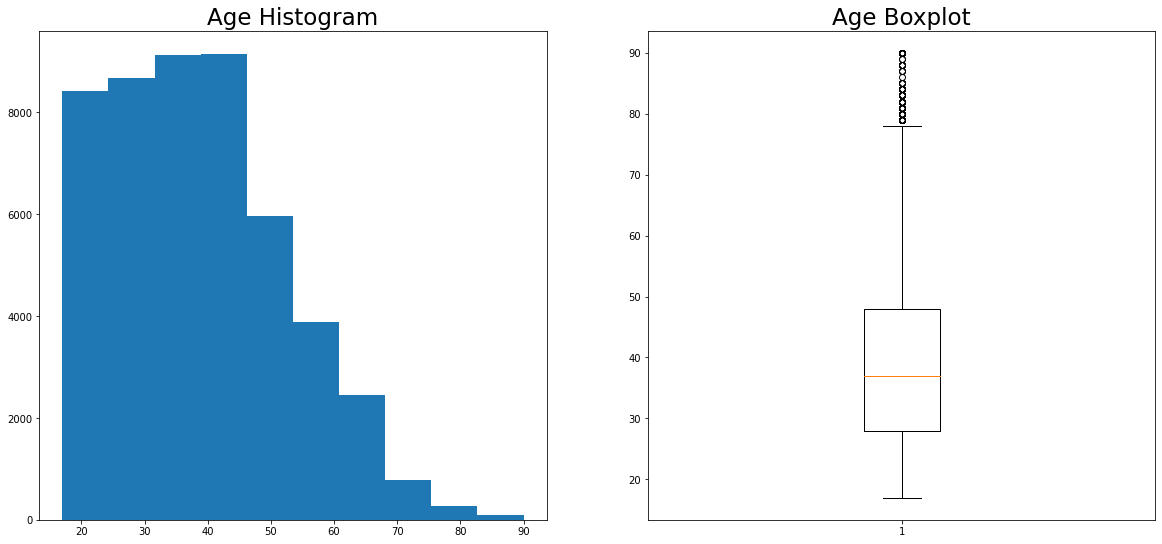

In [ ]:
import matplotlib.pyplot as plt
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['age'].values);
plt.title('Age Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['age'].values);
plt.title('Age Boxplot', fontsize=23);

- Age histogram is right skewed. This is explainable as more humans live around 60-70 years of age. 
- In the boxplot, we can see that after the age of 77 we have outliers that go all the way up to 90 years. 

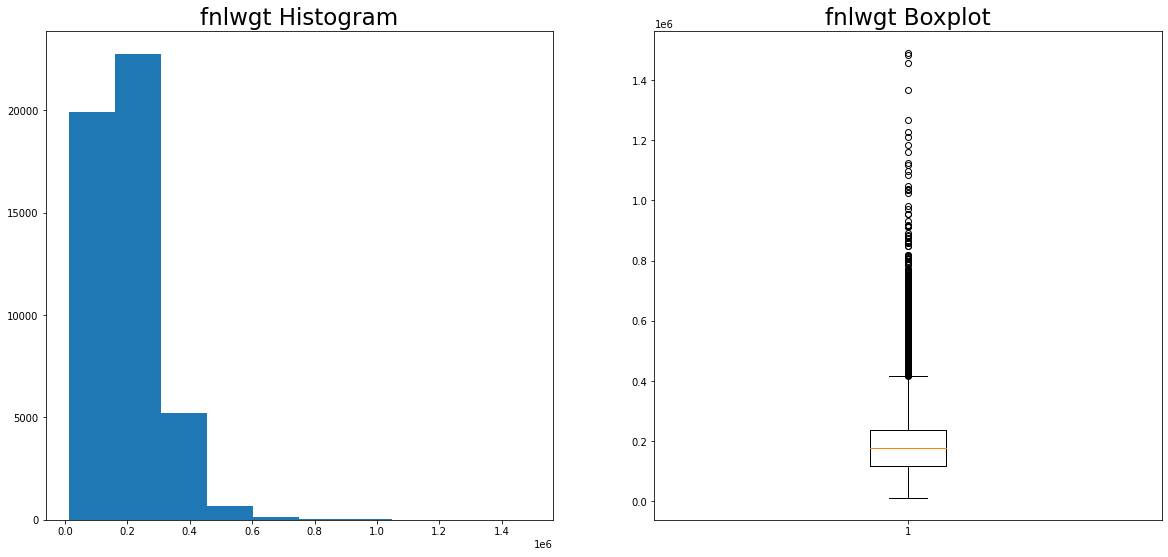

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['fnlwgt'].values);
plt.title('fnlwgt Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['fnlwgt'].values);
plt.title('fnlwgt Boxplot', fontsize=23);

- The fnlwgt is heavily right skewed. 
- The boxplot has many outliers. 
- There were no explanations of what this column is about. I think it talks about financial wieght, but I dont know what that means. I am yet to make a decision on whether to drop this column or not. I will make that decision after more research. 

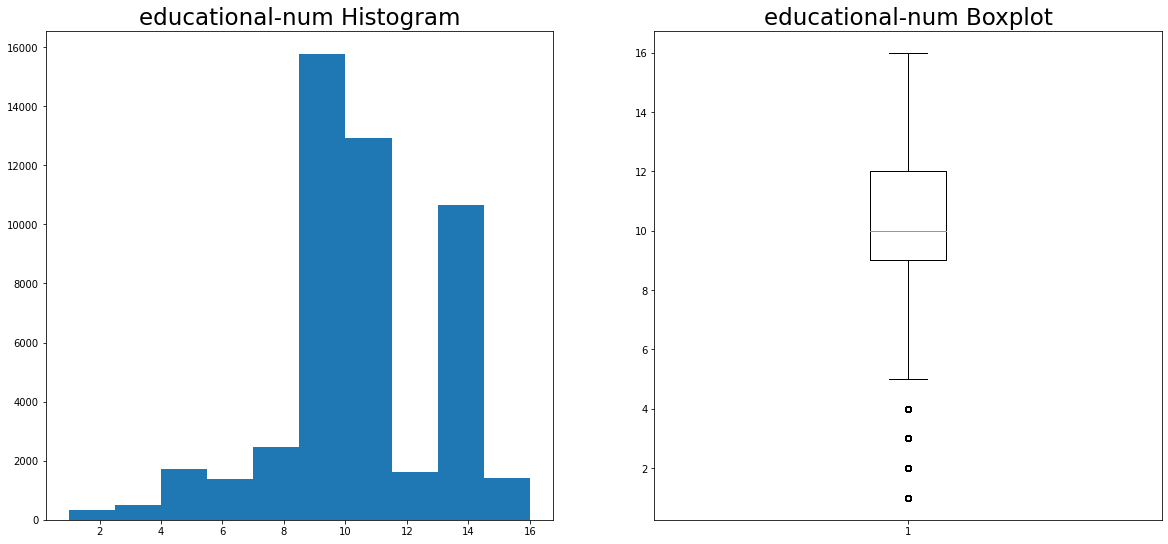

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['educational-num'].values);
plt.title('educational-num Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['educational-num'].values);
plt.title('educational-num Boxplot', fontsize=23);

- I feel like with Educational-number we are talking about for how many years a person has received an education. 
- The histogram is well within the reality that most people get about 10 - 14 years of education. 
- The outliers in the boxplot shows us that some individuals only received about 1 - 4 years of education. It will be interesting to know what countries is that for. 

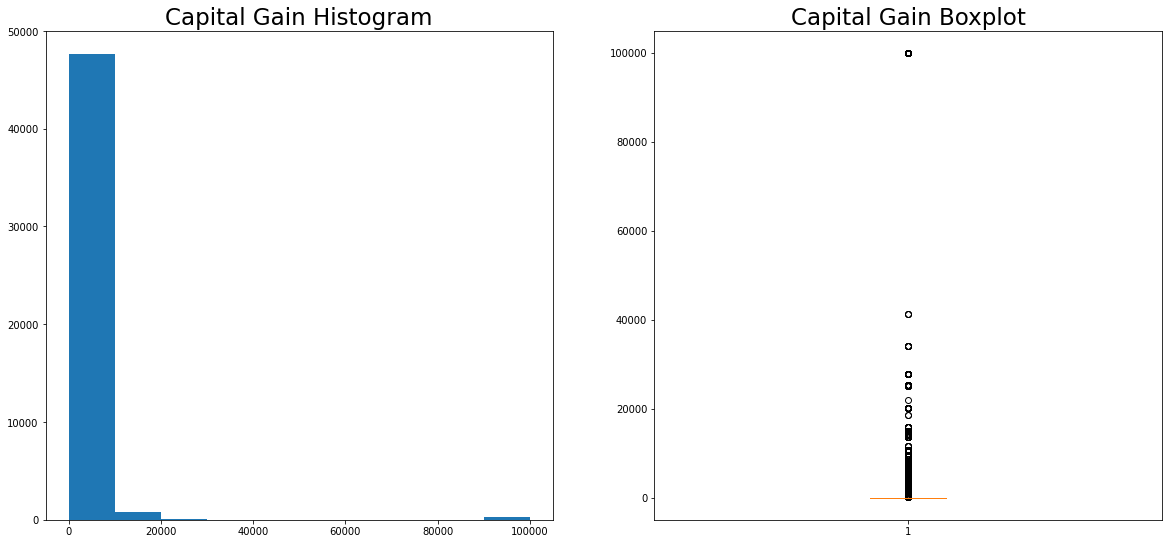

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['capital-gain'].values);
plt.title('Capital Gain Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['capital-gain'].values);
plt.title('Capital Gain Boxplot', fontsize=23);

- Capital gains have majority of its values at 0. Even though we can say that this column should be dropped I think that the model can learn an important thing about income inequality. 
- In the boxplot, we can see that the outliears are spread very wide. This confirms the idea of income inequality as well. 

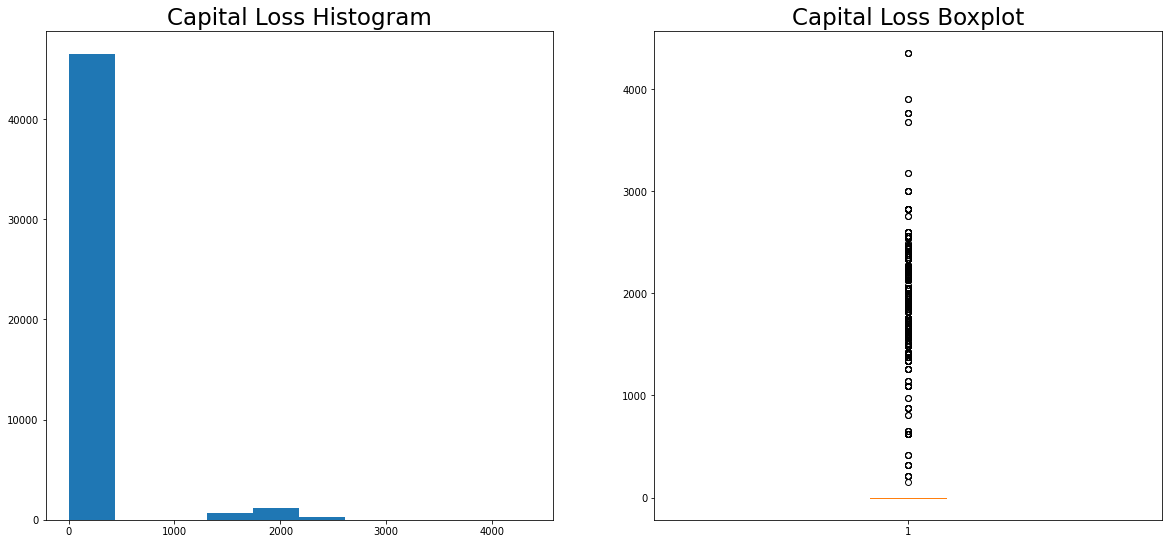

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['capital-loss'].values);
plt.title('Capital Loss Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['capital-loss'].values);
plt.title('Capital Loss Boxplot', fontsize=23);

- The histogram shows us that most people did not have a capital loss, maybe because they never had any capital gain. 
- The boxplot shows us a better picture of the outliers of the amount of capital loss individuals had.  

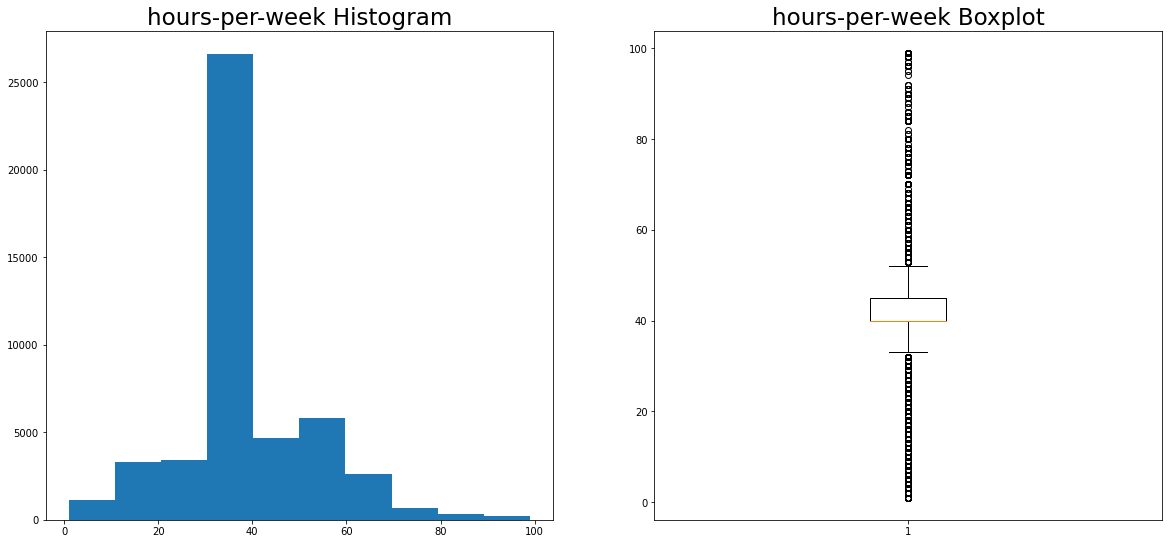

In [ ]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['hours-per-week'].values);
plt.title('hours-per-week Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['hours-per-week'].values);
plt.title('hours-per-week Boxplot', fontsize=23);

- The histogram is normally distributed with a peak at 40. 
- However, the boxplot shows us that the number of hours work differ a lot. The outliers go far and wide above and below the boxplot. 

# The two graphs below, (Gender & Race) to show that the data is skewed towards White and male categories. 

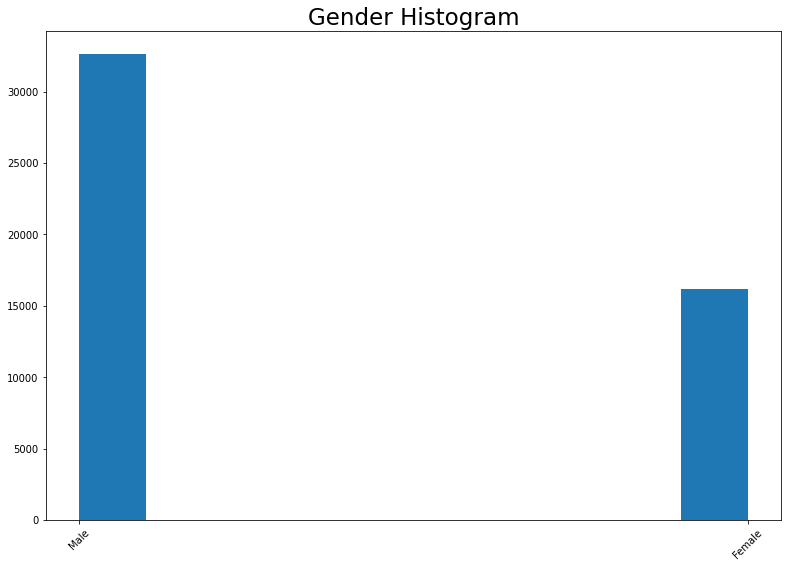

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['gender'].values);
plt.title('Gender Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Most of the sample consists of men. 
- The sampling of women is half of men. 

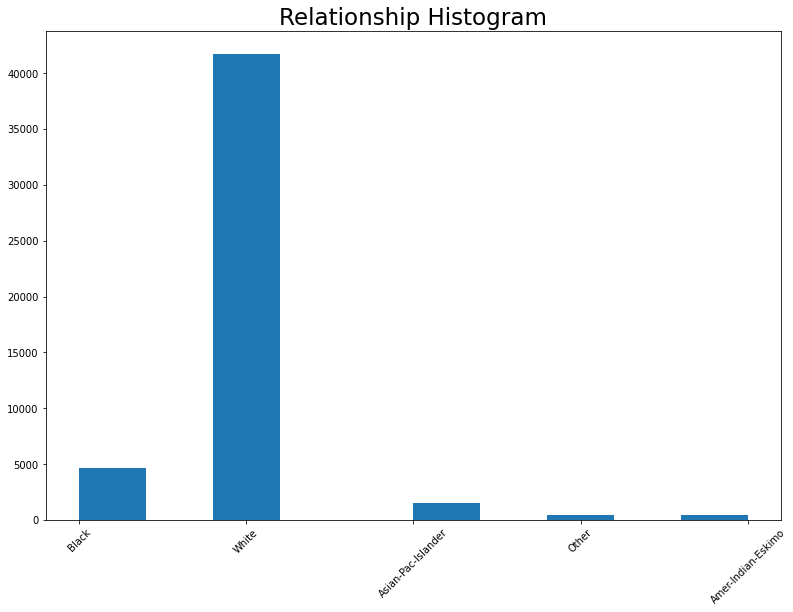

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['race'].values);
plt.title('Relationship Histogram', fontsize=23);
plt.xticks(rotation = 45);

- This shows us that the dataset is overwhelmed by people of White race. This could be a problem as we won't have a model that can predict from a wide range of races. 

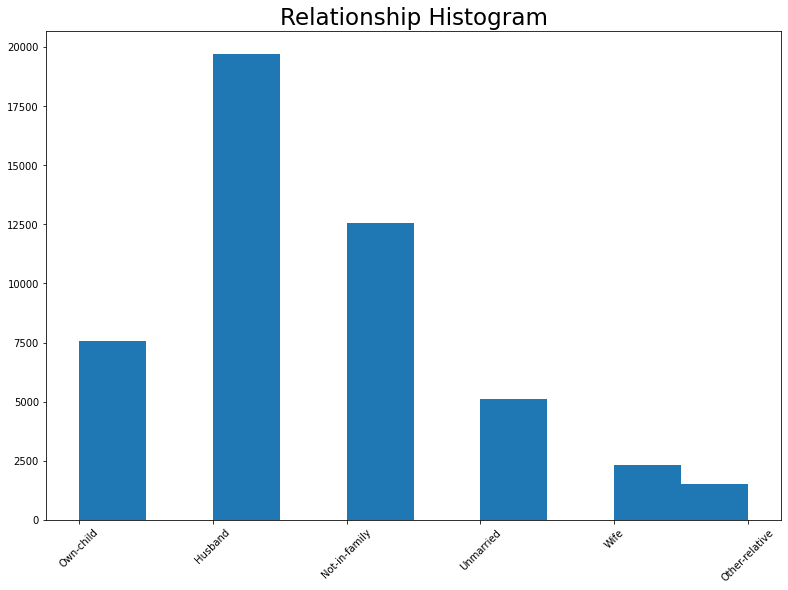

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['relationship'].values);
plt.title('Relationship Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Majority of the sampled individuals are either husbands or Not in family type. 

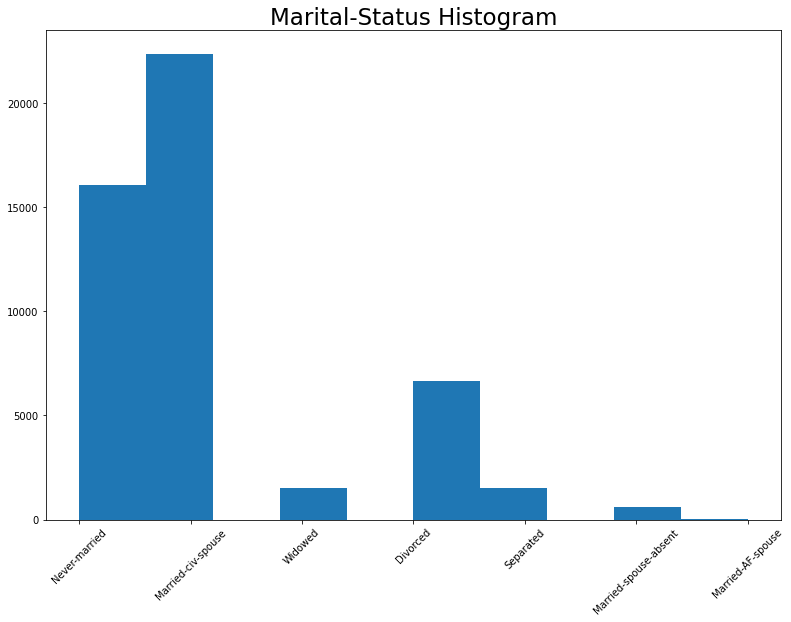

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['marital-status'].values);
plt.title('Marital-Status Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Majority of the samples we have are of people who have either never married or Married-civ-spouse.

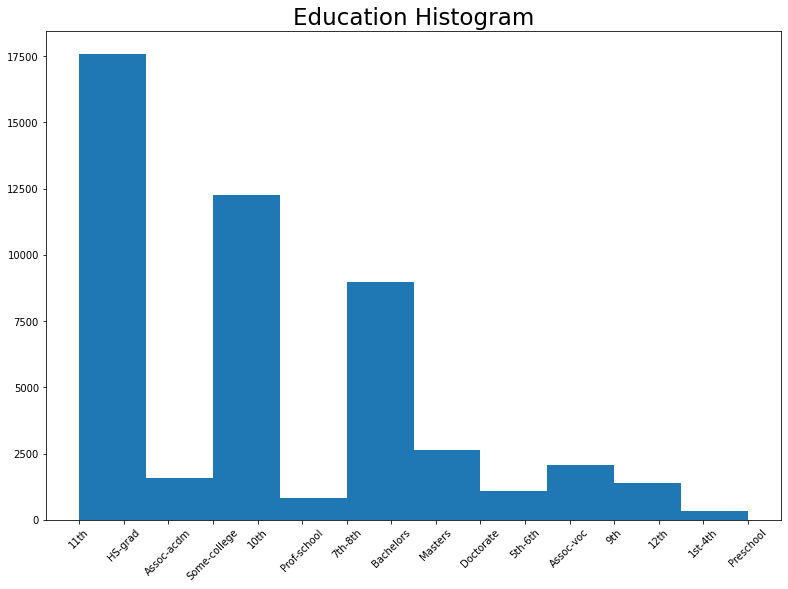

In [ ]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['education'].values);
plt.title('Education Histogram', fontsize=23);
plt.xticks(rotation = 45);

- The education histogram is very interesting because the number of people with different education levels vary alot. 

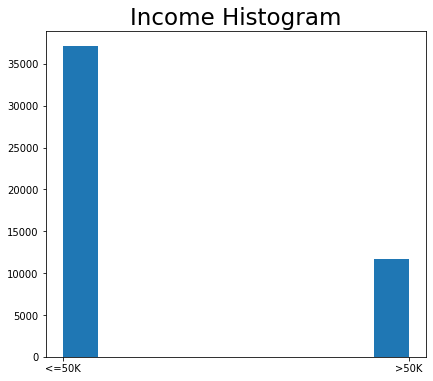

In [ ]:
#Setting the figure size:
plt.figure(figsize = (15,6))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['income'].values);
plt.title('Income Histogram', fontsize=23);


- The histogram of the target column shows us that most indiviuals make below 50 thousand dollars. 
- Individuals who make more than 50 thousand dollars are one third of its counterpart. 

## Multi-variate Exploration

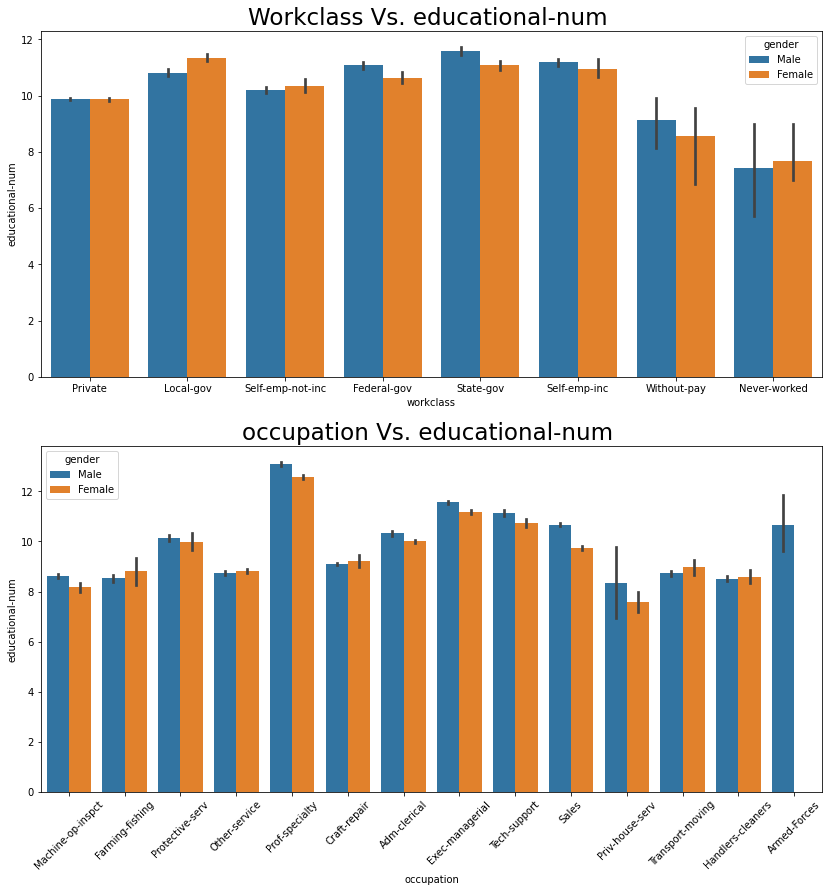

In [ ]:
import seaborn as sns
#Setting the figure size:
plt.figure(figsize = (14,14))

#Barplot
plt.subplot(2, 1, 1);
sns.barplot(x = 'workclass', y = 'educational-num', hue = 'gender', data = df);
plt.title('Workclass Vs. educational-num ', fontsize= 23);

#Barplot
plt.subplot(2, 1, 2);
sns.barplot(x = 'occupation', y = 'educational-num',hue = 'gender', data = df);
plt.title('occupation Vs. educational-num ', fontsize= 23);
plt.xticks(rotation = 45);



- For most workclasses and occupations the number of years of education between men and women are a mix. 
- The biggest outlier is the education number for Armed Forces. This data suggests that women don't have any education in this field which does not seem to be true.

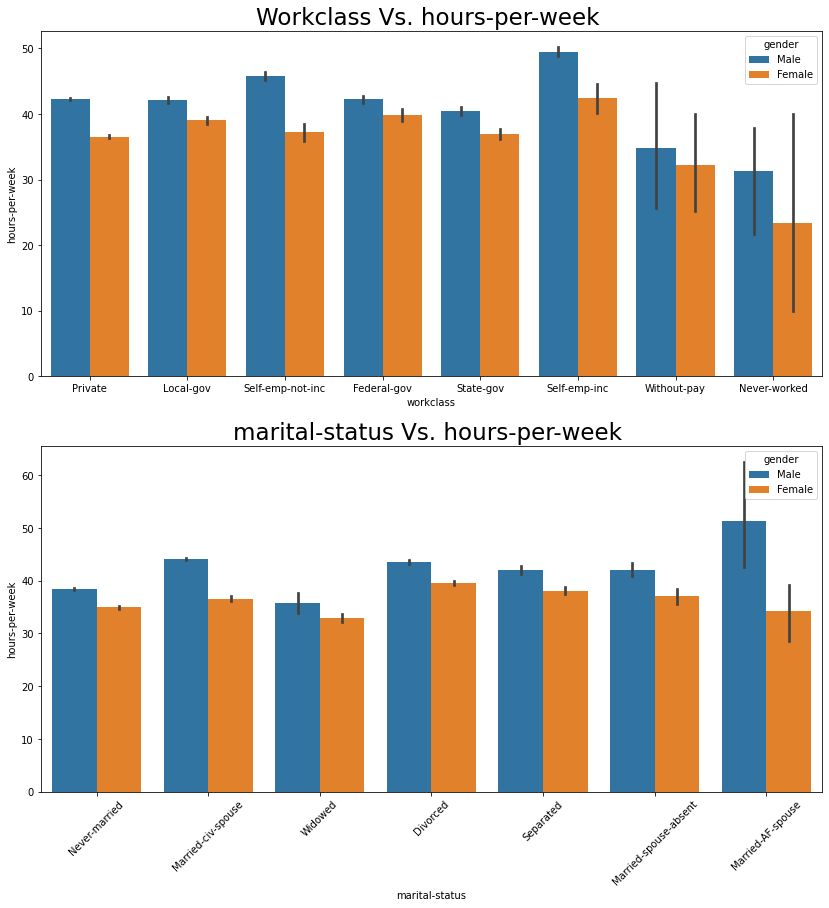

In [ ]:
#Setting the figure size:
plt.figure(figsize = (14,14))

#Barplot
plt.subplot(2, 1, 1);
sns.barplot(x = 'workclass', y = 'hours-per-week', hue = 'gender', data = df);
plt.title('Workclass Vs. hours-per-week ', fontsize= 23);

#Barplot
plt.subplot(2, 1, 2);
sns.barplot(x = 'marital-status', y = 'hours-per-week',hue = 'gender', data = df);
plt.title('marital-status Vs. hours-per-week ', fontsize= 23);
plt.xticks(rotation = 45);

- Looks like in every profession men worked more hours than women. 
- In every martial status, as well, men worked more hours. 
- This also could be because women have to take care of the family and do household chores. 

## **Explanatory Visualization**

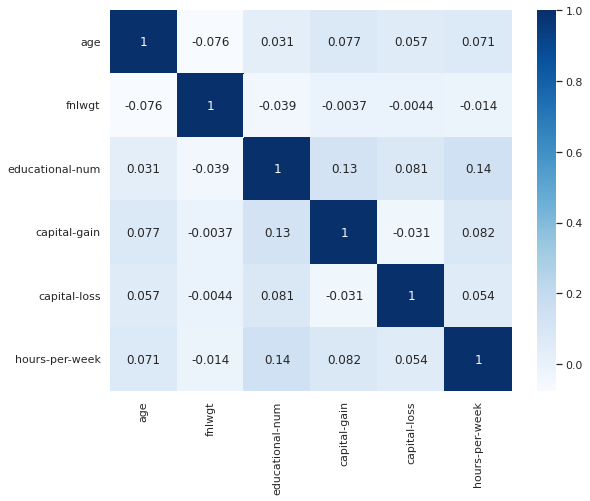

In [ ]:
corr = df.corr()
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#Graphing the calculated correlation. 
sns.set(rc = {'figure.figsize' : (9,7)});
sns.heatmap(corr, cmap = 'Blues', annot = True);
plt.savefig('heatmap_of_correlation_final5.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


- **Columns have very weak positive and negative correlation.** 

- **We must also remember that correlation does not mean causation.** 

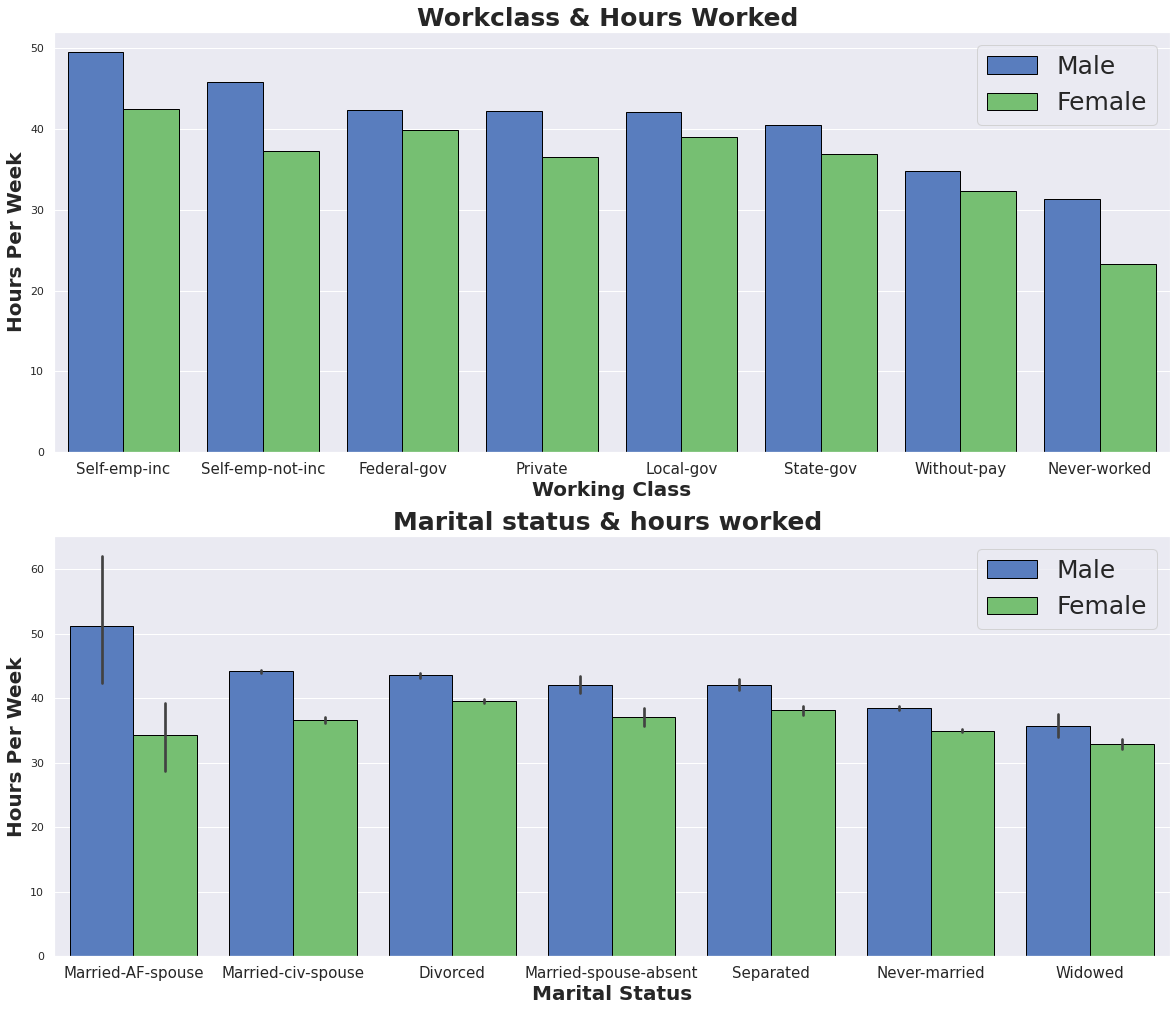

In [ ]:
#Selecting a figure size for the graph:
plt.figure(figsize = (20,17))

#creating a suplot
plt.subplot(2, 1, 1)

#setting the format style. 
plt.ticklabel_format(style='plain', axis='y')
plt.style.use('seaborn-muted')

#Barplot 1 
sns.barplot(x = 'workclass', y = 'hours-per-week', 
            hue = 'gender', data = df, ci=None, edgecolor='black', order = ['Self-emp-inc','Self-emp-not-inc', 'Federal-gov','Private','Local-gov','State-gov','Without-pay','Never-worked'])

#Making the graph more presentable:
plt.title('Workclass & Hours Worked ', fontsize= 25, fontweight='bold')
plt.xlabel('Working Class', fontsize=20, fontweight='bold')
plt.ylabel('Hours Per Week', fontsize=20, fontweight='bold')
plt.xticks(rotation = 0, fontsize = 15)
plt.legend(fontsize = 25);

#creating a suplot
plt.subplot(2, 1, 2)

#Barplot
sns.barplot(x = 'marital-status', y = 'hours-per-week',hue = 'gender', data = df,  edgecolor='black',
            order = ['Married-AF-spouse','Married-civ-spouse','Divorced','Married-spouse-absent','Separated','Never-married','Widowed']);

#Making the graph more presentable:
plt.title('Marital status & hours worked ', fontsize= 25,fontweight='bold')
plt.xlabel('Marital Status', fontsize=20,fontweight='bold')
plt.ylabel('Hours Per Week', fontsize=20, fontweight='bold')
plt.xticks(rotation = 0, fontsize = 15)
plt.legend(fontsize = 25);

plt.savefig('workclass_maritalStatus_Hours_worked.png',bbox_inches = "tight", dpi = 'figure', transparent = False)



### **Observations:**
- **In Marital and Workclass status men have worked more hours than women.**
- **This shows us that men still get more freedom when it comes to working on their career over women.**
- **We can also conclude that women take higher responsibilities like taking care of their children and of the household over men.**


### **White - Male Bias**

#### **Male Bias**

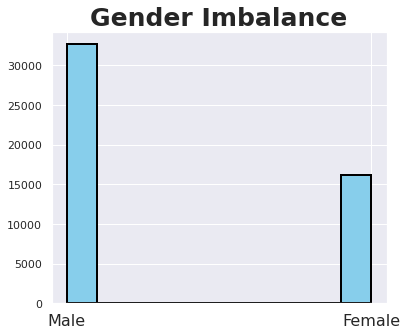

In [ ]:
import seaborn as sns
#Setting the figure size
plt.figure(figsize = (6,5))

#Selecting a style for the graph
plt.style.use('seaborn-muted')

#Histogram
plt.hist(df['gender'].values, color = 'skyblue', ec="black", lw = 2)
plt.title('Gender Imbalance', fontsize=25, fontweight='bold')
plt.xticks(fontsize = 16);

plt.savefig('gender_imbalance.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


#### **White Race Bias**

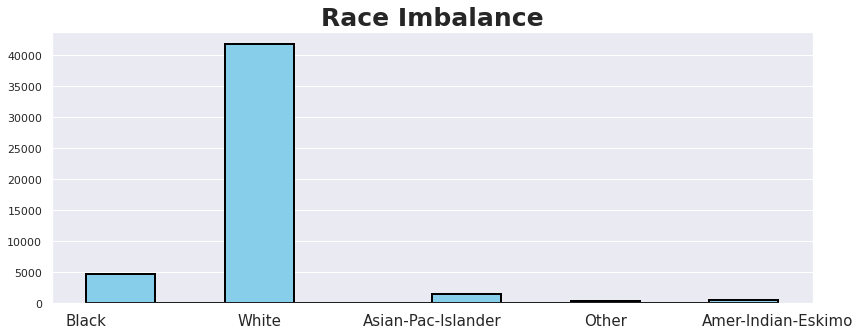

In [ ]:
#Setting the figure size:
plt.figure(figsize = (30,5))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['race'].values, color = 'skyblue', ec="black", lw=2);
plt.title('Race Imbalance', fontsize=25,fontweight='bold');
plt.xticks(fontsize=15);
#Customing the graph for presentation:
plt.grid(axis = 'x');
plt.savefig('race_imbalance.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


### **Observations:**
- **We see that this dataset is heavily skewed towards Men and particularly White Men.**
- **This is because of lack of diverse individuals that were sampled.**
- **This is also because of lack participation and lack of effort.** 

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


### Final decisions before Model Building. 
- I will be dropping Fnlwgt and Educational-num as we don't know what it is showing us.
- I will be changing Income column from >=50K to Middle class and <500K to Below Middle Class.  

In [ ]:
#dropping Fnlwgt and educational-num
df.drop(columns= ['fnlwgt','educational-num'], axis = 1, inplace = True)

In [ ]:
#mapping Income column
df['income'] = df['income'].map({'<=50K':'Below Middle Class',
                  '>50K': 'Middle Class'})

In [ ]:
df.head(3)

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,Below Middle Class
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,Below Middle Class
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,Middle Class


### Creating features and targets. 

In [ ]:
X = df.drop(columns= 'income')

y = df['income']

In [ ]:
X.shape

(48790, 12)

In [ ]:
y.head()

0    Below Middle Class
1    Below Middle Class
2          Middle Class
3          Middle Class
4    Below Middle Class
Name: income, dtype: object

### Train Test Split

In [ ]:
#importing train test split
from sklearn.model_selection import train_test_split

#creating train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#importing make_column_transformer and make_column_selector
from sklearn.compose import make_column_selector, make_column_transformer

In [ ]:
#making column selectors
#numeric
numeric_selector = make_column_selector(dtype_include= 'number')

#categorical
categorical_selector = make_column_selector(dtype_include= 'object')

In [ ]:
#importing SimpleImputer
from sklearn.impute import SimpleImputer

#Imputing mean for numeric
mean_imputer = SimpleImputer(strategy='mean')

#Imputing most_frequent for categorical 
most_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
#importing StandardScaler & OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown= 'ignore')


### Making Pipelines

In [ ]:
#to better visualize the pipelines.
from sklearn import set_config
set_config(display='diagram');

#importing pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
#numeric pipeline
numeric_pipeline = make_pipeline(mean_imputer, scaler)

#categorical pipeline
categorical_pipeline = make_pipeline(most_imputer, ohe)

### Creating Tuples for Column Transformation

In [ ]:
num_tuple = (numeric_pipeline, numeric_selector)

cat_tuple = (categorical_pipeline, categorical_selector)


### Instantiating preprocessor

In [ ]:
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782adee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782ad490>)])

#### Fitting the preprocessor on to X_train

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782adee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782ad490>)])

#### Transforming the X_train and X_test

In [ ]:
#X_train transformed
X_train_processed = preprocessor.transform(X_train)

#X_test transformed
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed.shape

(36592, 103)

In [ ]:
X_test_processed.shape

(12198, 103)

### Trying Multiple Models to find the best one.

#### Logistic Regression

##### Default Logistic Regression Model

In [ ]:
import warnings
#importing Logistic Regression. 
from sklearn.linear_model import LogisticRegression

#initializing the model 
log_reg = LogisticRegression()

#making a pipeline
log_reg_pipeline = make_pipeline(preprocessor, log_reg)

#fitting the data
log_reg_pipeline.fit(X_train, y_train)

#predicting
log_default_pred_X_test = log_reg_pipeline.predict(X_test)

#printing prediction
log_default_pred_X_test

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [ ]:
#model scores
print("Log default model train score" + " "+ str(log_reg_pipeline.score(X_train, y_train)))
print("Log default model test score" + " "+ str(log_reg_pipeline.score(X_test, y_test)))

Log default model train score 0.8520441626585046
Log default model test score 0.8505492703721922


In [ ]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix

#predicting
pred = log_reg_pipeline.predict(X_test)

#creating a confusion matrix
c_mat = confusion_matrix(y_test, pred, normalize='true')

#turning the confusion matrix into a DataFrame
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.936340,0.063660
1,0.420819,0.579181


With the defaul Log Reg version the True Negative is good, but the False Negative is higher than acceptable. 

# Confusion Matrix does not display on VS Code

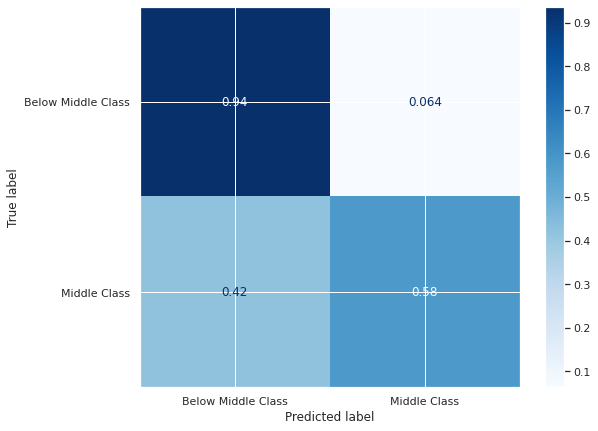

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize='true', cmap = 'Blues' );

### Hyper Tuning Logistic Regression 

##### L1 Tuning
##### Solver = Saga

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Scores:


{0.001: 0.7891457616002623,
 0.01: 0.8442367601246106,
 0.1: 0.8513690768978521,
 1.0: 0.8505492703721922,
 10.0: 0.8506312510247581,
 100.0: 0.8506312510247581,
 1000.0: 0.8506312510247581}

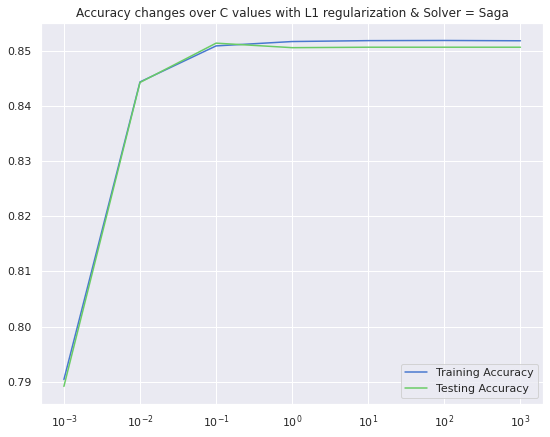

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

#creating an emtpy train score variable
train_score = []

#creating an emtpy test score variable
test_score = []

#creating a loop to get the best c_value
for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

0.1 gave the best result at 0.851

##### L1 Tuning
##### Solver = liblinear

Test Scores:


{0.001: 0.7936546974913921,
 0.01: 0.8434989342515167,
 0.1: 0.8513690768978521,
 1.0: 0.8505492703721922,
 10.0: 0.8507132316773242,
 100.0: 0.8506312510247581,
 1000.0: 0.8507132316773242}

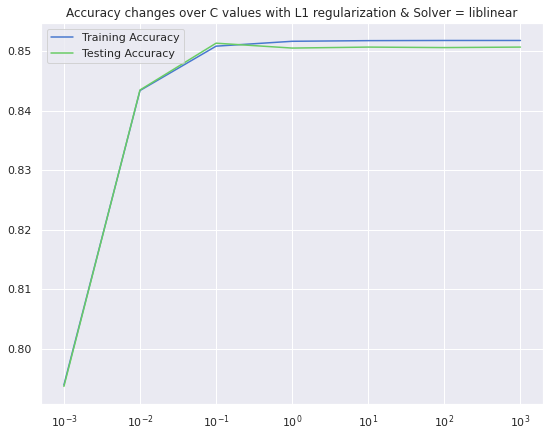

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = liblinear')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

Best: C = 0.1 

##### L2 Tuning
##### Solver = Saga

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Scores:


{0.001: 0.824151500245942,
 0.01: 0.8480898507952124,
 0.1: 0.8514510575504181,
 1.0: 0.8507132316773242,
 10.0: 0.8503853090670602,
 100.0: 0.8506312510247581,
 1000.0: 0.8506312510247581}

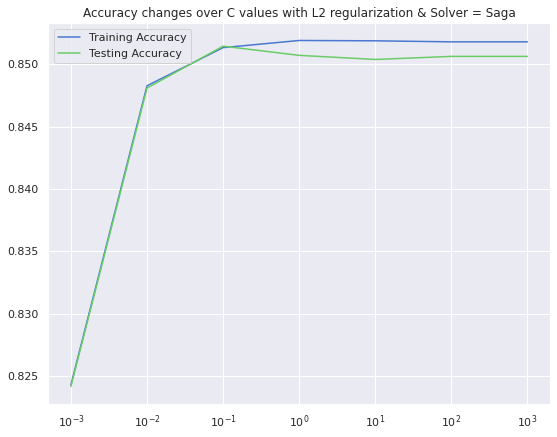

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

C = 0.1 gives 0.85145 the highest so far. 

##### L2 Tuning
##### Solver = Liblinear

Test Scores:


{0.001: 0.8247253648139039,
 0.01: 0.8480898507952124,
 0.1: 0.8514510575504181,
 1.0: 0.8507132316773242,
 10.0: 0.8503853090670602,
 100.0: 0.8507132316773242,
 1000.0: 0.8507132316773242}

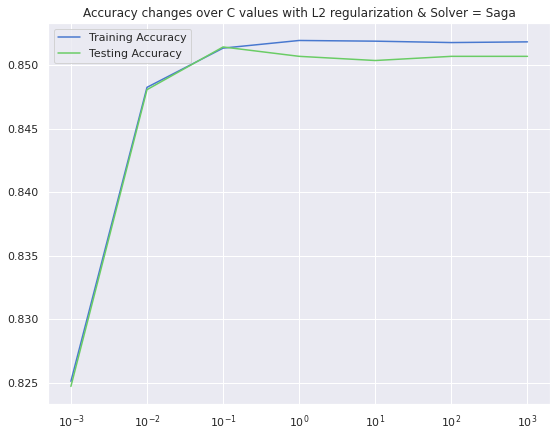

In [ ]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

This model is very identical to the L2 and Saga model. They both have the same tragectory when it comes to their train and test score. 

### Logistic Regression Model Choice: 
- Penatly: L2
- C = 0.1
- Solver = liblinear

### Log Reg Tuned Model

In [ ]:
#initializing the model 
log_reg_tuned = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l2')

#making a pipeline
tuned_log_reg_pipeline = make_pipeline(preprocessor, log_reg_tuned)

#fitting the data
tuned_log_reg_pipeline.fit(X_train, y_train)

#predicting
tuned_log_pred_X_test = tuned_log_reg_pipeline.predict(X_test)

#printing prediction
tuned_log_pred_X_test

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [ ]:
#confusion matrix
c_mat = confusion_matrix(y_test, tuned_log_pred_X_test, normalize='true')
#converting the matrix into a dataframe
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.938282,0.061718
1,0.423208,0.576792


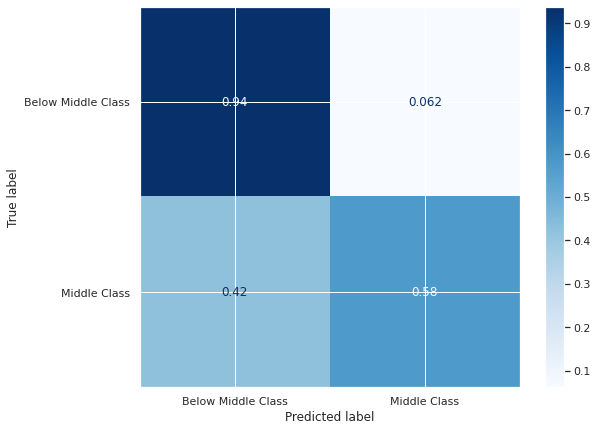

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_log_pred_X_test, normalize='true', cmap = 'Blues' );

## KNN

### KNN Default Model

In [ ]:
#importing KNN Classifier model. 
from sklearn.neighbors import KNeighborsClassifier

#initializing KNN models. 
knn = KNeighborsClassifier(n_neighbors=1)

#creating a pipeline 
knn_prep_pipe = make_pipeline(preprocessor, knn) 

#fitting the data 
knn_prep_pipe.fit(X_train, y_train) 

#making predictions 
knn_default_predictions_test = knn_prep_pipe.predict(X_test) 
knn_default_predictions_test

array(['Middle Class', 'Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [ ]:
#printing the scores of both training and testing model 
print("Log default model train score" + " "+ str(knn_prep_pipe.score(X_train, y_train)))
print("Log default model test score" + " "+ str(knn_prep_pipe.score(X_test, y_test)))

Log default model train score 0.9684630520332314
Log default model test score 0.8052959501557633


In [ ]:
#creating a confusion matrix
knn_c_mat = confusion_matrix(y_test, knn_default_predictions_test, normalize='true')

#converting the matrix into a dataframe
cmat_df = pd.DataFrame(knn_c_mat)
cmat_df

,0,1
0,0.872572,0.127428
1,0.407509,0.592491


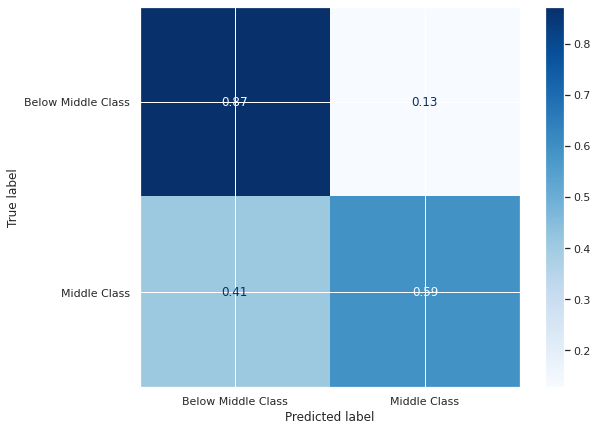

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_default_predictions_test, normalize='true', cmap = 'Blues' );

This model is better than the Log Reg models as the False Negative is lower. 

#### Tuning the KNN Model.

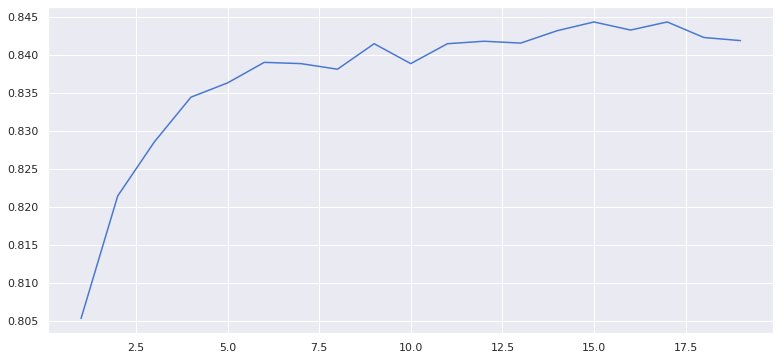

The best accuracy 0.8444007214297425. 
The best n_neighbor score 15. 


In [ ]:
#importing the accuracy score
from sklearn.metrics import accuracy_score 

#setting a knn range
knn_range = range(1,20)
#creating an empty test_accuracy variable
test_accuracy = []
#Setting best_accuracy and best_k variables to zero as they will be appended soon
best_accuracy = 0
best_k = 0

#creating a loop to find the best n_neighbors for the model. 
for k in knn_range:
  #initialing KNN
  knn = KNeighborsClassifier(n_neighbors=k)

  #creating the pipeline of preprocessor and KNN
  knn_prep_pipe = make_pipeline(preprocessor, knn)
  
  #fitting the model. 
  knn_prep_pipe.fit(X_train, y_train)

  #predicting and finding the accuracy of the model. 
  predict_test = knn_prep_pipe.predict(X_test)

  #creating an accuracy variable
  acc = accuracy_score(y_test, predict_test)

  #finding the best accuracy and the best k values
  if acc > best_accuracy:
    best_accuracy = acc
    best_k = k

  #appending the best values to test_accuracy
  test_accuracy.append(acc)

#plotting the findings
plt.figure(figsize = (13,6))
plt.plot(knn_range, test_accuracy, label = 'Best KNN Scores')
plt.show()

#best k value and best accuracy
print(f'The best accuracy {best_accuracy}. \nThe best n_neighbor score {best_k}. ')

#### Creating the tuned KNN model.

In [ ]:
#creating a pipeline
tuned_knn_model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors= 15))

#fitting the model 
tuned_knn_model.fit(X_train, y_train)

#making the predictions
tuned_knn_predict = tuned_knn_model.predict(X_test)
tuned_knn_predict

array(['Below Middle Class', 'Middle Class', 'Below Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [ ]:
#creating a confusion matrix
tuned_knn_c_mat = confusion_matrix(y_test, tuned_knn_predict, normalize='true')

#converting the matrix into a dataframe
tuned_cmat_df = pd.DataFrame(tuned_knn_c_mat)
tuned_cmat_df

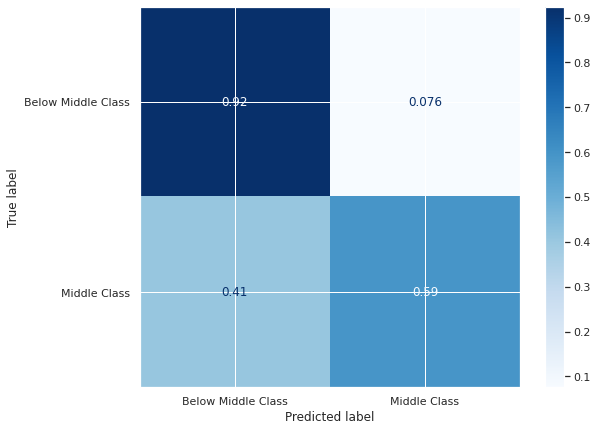

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_knn_predict, normalize='true', cmap = 'Blues' );

## KNN with 15 neighbors is the best model. 

## Using PCA for dimension reductionality and creating models. 
### Understadning that while most of the columns are categorical, PCA won't really help. 

In [ ]:
#creating a new copy of the df
df2 = df.copy()

df2.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,Below Middle Class
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,Below Middle Class
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,Middle Class
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,Middle Class
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,Below Middle Class


### Feature Engineering.

In [ ]:
#Subtracting Capital loss from Capital gain 
df2['Net_Capital_Gain'] = df2['capital-gain'] - df2['capital-loss']

#droppoing capital gain and loss columns
df2.drop(columns = ['capital-gain','capital-loss'], axis = 1, inplace = True)

df2.head(2)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0


In [ ]:
#creating X and y 
df2_X = df2.drop(columns=['income'])
df2_y = df2['income']

df2_X.head(2)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,Net_Capital_Gain
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0


In [ ]:
#train test split df2
X_train, X_test, y_train, y_test = train_test_split(df2_X, df2_y, random_state=42)

In [ ]:
#importing PCA
from sklearn.decomposition import PCA

#initializing pca
pca = PCA(n_components= 0.85)

In [ ]:
pca_X_train_pro = preprocessor.fit_transform(X_train)

pca_X_train_pro.shape

(36592, 102)

In [ ]:
#making a pipeline that will take in the preprocessor, pca and knn
knn = KNeighborsClassifier()

log_reg = LogisticRegression()

pca_knn_preprocessor_pipeline = make_pipeline(preprocessor,pca, log_reg)

pca_knn_preprocessor_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782adee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782ad490>)])),
                ('pca', PCA(n_components=0.85)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pca_knn_preprocessor_pipeline.fit(X_train, y_train)

TypeError: ignored

#### PCA did not work on this dataset.

## Creating a KMeans model

In [ ]:
#importing KMeans
from sklearn.cluster import KMeans

#creating a copy of the dataset. 
df3 = df2.copy()

df3.head(2)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0


In [ ]:
df3_preprocessed = preprocessor.fit_transform(df3)

In [ ]:
df3_preprocessed.shape

(48790, 104)

In [ ]:
#initializing KMeans
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(df3_preprocessed)

KMeans(n_clusters=2)

### Looking into the Inertia and Silhouetter Score to find the best number of clustes. 

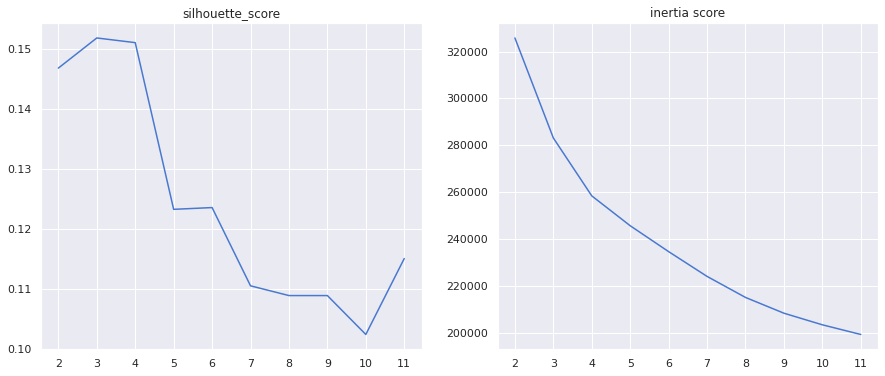

In [ ]:
from sklearn.metrics import silhouette_score

# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,12)
silh_score = []
inertias = []

#looping
for k in ks:
  kmeans = KMeans(n_clusters = k, random_state= 42)
  kmeans.fit(df3_preprocessed)
  #append silhouette_score
  silh_score.append(silhouette_score(df3_preprocessed, kmeans.labels_))
  #append inertia
  inertias.append(kmeans.inertia_)

#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize = (15,6))
axes[0].plot(ks, silh_score)
axes[0].set_title('silhouette_score')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('inertia score')
axes[1].set_xticks(ks)

Looking at the Silhouette Score and Inertia, I will go with 4 clusters as it seem to have a high Silhouetter Score and the diminishing returns for the inertia starts to happen after 4 clusters. 

#### Creating a Kmeans model with 4 clusters. 

In [ ]:
#initializing KMeans
kmeans = KMeans(n_clusters=4)

kmeans.fit(df3_preprocessed)

df3['cluster'] = kmeans.labels_

df3['cluster'].value_counts()

cluster_group = df3.groupby('cluster', as_index = False).mean()
cluster_group

,cluster,age,hours-per-week,Net_Capital_Gain
0,0,50.987922,35.557549,422.356394
1,1,42.510324,46.735092,855.808440
2,2,46.610656,50.475410,99999.000000
3,3,26.132271,36.213279,128.857776


### Using Ordinal Encoder to see if we can build a good model. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

OE

OrdinalEncoder()

In [ ]:
#numeric pipeline
numeric_pipeline = make_pipeline(mean_imputer, scaler)

#categorical pipeline
OE_categorical_pipeline = make_pipeline(most_imputer, OrdinalEncoder())

In [ ]:
OE_categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder())])

In [ ]:
num_tuple = (numeric_pipeline, numeric_selector)

OE_cat_tuple = (OE_categorical_pipeline, categorical_selector)

OE_cat_tuple

(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder', OrdinalEncoder())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7ff7782ad490>)

In [ ]:
OE_preprocessor = make_column_transformer(num_tuple, OE_cat_tuple, remainder= 'passthrough')

OE_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782adee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782ad490>)])

#### Creating Log Reg Model with Ordinal Encoder. I will be uaing the Log Reg with hyperparameters tuned. 

In [ ]:
#initializing the model 
log_reg_tuned = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l2')

#making a pipeline
tuned_log_reg_pipeline = make_pipeline(OE_preprocessor, log_reg_tuned)

#fitting the data
tuned_log_reg_pipeline.fit(X_train, y_train)

#predicting
tuned_log_pred_X_test = tuned_log_reg_pipeline.predict(X_test)

#printing prediction
tuned_log_pred_X_test

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [ ]:
#confusion matrix
c_mat = confusion_matrix(y_test, tuned_log_pred_X_test, normalize='true')
#converting the matrix into a dataframe
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.965580,0.034420
1,0.748464,0.251536


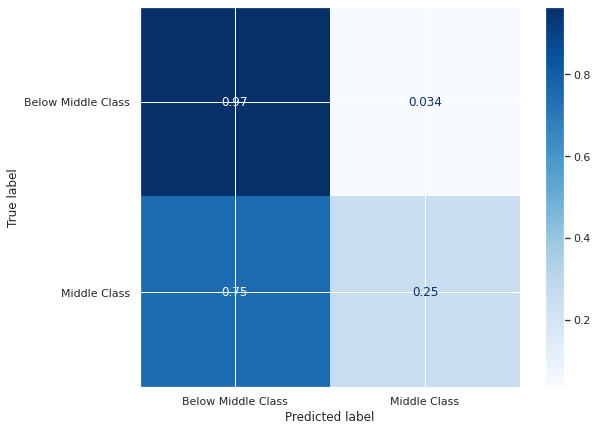

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_log_pred_X_test, normalize='true', cmap = 'Blues' );

This was a worse model than the one we did with One Hot Encoder. False Negative is through the roof. 

### Trying the same thing with KNN model as well. Using the tuned KNN model. 

In [ ]:
#creating a pipeline
OE_knn_model = make_pipeline(OE_preprocessor, KNeighborsClassifier(n_neighbors= 15))

#fitting the model 
OE_knn_model.fit(X_train, y_train)

#making the predictions
OE_tuned_knn_predict = OE_knn_model.predict(X_test)
OE_tuned_knn_predict

array(['Below Middle Class', 'Below Middle Class', 'Below Middle Class',
       ..., 'Below Middle Class', 'Below Middle Class',
       'Below Middle Class'], dtype=object)

In [ ]:
#creating a confusion matrix
OE_tuned_knn_c_mat = confusion_matrix(y_test, OE_tuned_knn_predict, normalize='true')

#converting the matrix into a dataframe
OE_tuned_cmat_df = pd.DataFrame(tuned_knn_c_mat)
OE_tuned_cmat_df

,0,1
0,0.924148,0.075852
1,0.407850,0.592150


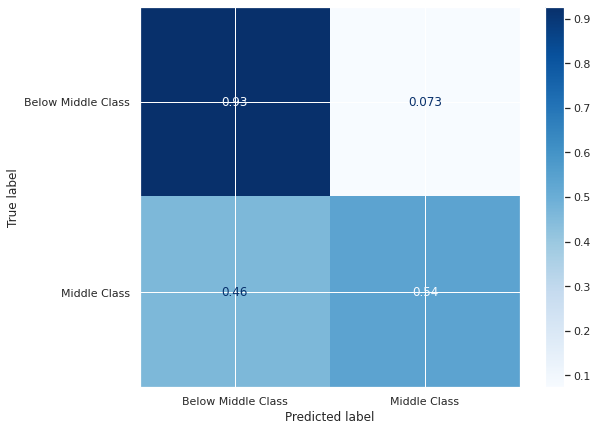

In [ ]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, OE_tuned_knn_predict, normalize='true', cmap = 'Blues' );

This model is worse than the KNN model with One Hot Encoder. 

### Clustering with OneHotEncode

In [ ]:
#importing KMeans
from sklearn.cluster import KMeans

#creating a copy of the dataset. 
df3 = df2.copy()

df3.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,Middle Class,0
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,Middle Class,7688
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States,Below Middle Class,0


In [ ]:
#categorical pipeline
OE_categorical_pipeline = make_pipeline(most_imputer, OrdinalEncoder())

#will not be using StandardScaler as we will be using Ordinal Encoder only
num_tuple = (mean_imputer, numeric_selector)

OE_cat_tuple = (OE_categorical_pipeline, categorical_selector)

OE_preprocessor = make_column_transformer(num_tuple, OE_cat_tuple, remainder= 'passthrough')

OE_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782adee0>),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff7782ad490>)])

In [ ]:
df3_preprocessed = OE_preprocessor.fit_transform(df3)

df3_preprocessed.shape

(48790, 12)

In [ ]:
df3_p = pd.DataFrame(data=df3_preprocessed, columns= df3.columns)

df3_p.tail()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
48785,27.0,38.0,0.0,3.0,7.0,2.0,12.0,5.0,4.0,0.0,38.0,0.0
48786,40.0,40.0,0.0,3.0,11.0,2.0,6.0,0.0,4.0,1.0,38.0,1.0
48787,58.0,40.0,0.0,3.0,11.0,6.0,0.0,4.0,4.0,0.0,38.0,0.0
48788,22.0,20.0,0.0,3.0,11.0,4.0,0.0,3.0,4.0,1.0,38.0,0.0
48789,52.0,40.0,15024.0,4.0,11.0,2.0,3.0,5.0,4.0,0.0,38.0,1.0


#### Education colume is behaving weird, so I will be dropping it. 

In [ ]:
df3_p.drop(columns = ['education'], axis = 1, inplace = True )

In [ ]:
df3_p.head(2)

,age,workclass,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25.0,40.0,3.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,0.0
1,38.0,50.0,3.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,0.0


In [ ]:
#initializing KMeans
kmeans = KMeans(n_clusters=4)

kmeans.fit(df3_p)

df3_p['cluster'] = kmeans.labels_

df3_p['cluster'].value_counts()

1    22973
0    13804
2     6821
3     5192
Name: cluster, dtype: int64

In [ ]:
df3_p.head()

,age,workclass,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain,cluster
0,25.0,40.0,3.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,0.0,1
1,38.0,50.0,3.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,0.0,2
2,28.0,40.0,1.0,7.0,2.0,10.0,0.0,4.0,1.0,38.0,1.0,1
3,44.0,40.0,3.0,15.0,2.0,6.0,0.0,2.0,1.0,38.0,1.0,0
4,18.0,30.0,3.0,15.0,4.0,9.0,3.0,4.0,0.0,38.0,0.0,3


In [ ]:
cluster_group = df3_p.groupby('cluster', as_index = False).mean()
cluster_group

,cluster,age,workclass,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,0,55.132353,37.201608,3.089612,10.027166,2.265865,6.081788,1.108737,3.674660,0.674804,36.352362,0.310635
1,1,31.152657,41.057807,3.023593,10.387629,2.750141,5.870152,1.589388,3.631089,0.664911,36.351630,0.177600
2,2,41.690954,60.031667,3.345257,10.743000,2.170503,6.654889,0.748277,3.786981,0.843571,36.734790,0.461369
3,3,24.032935,20.445108,3.140794,9.942797,3.558166,6.939522,2.601117,3.656394,0.437211,36.633282,0.031972


Nothing of value was found. 